In [3]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

C:\Users\rchoudhary\AppData\Local\Temp\ipykernel_22508\2426236682.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

fuel = pd.read_csv('fuel.csv')

In [5]:
X = fuel.copy()
# Remove target
y = X.pop('FE')

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [50]


C:\Users\rchoudhary\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [8]:
from tensorflow import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

In [10]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [12]:
history = model.fit(
    X, y,
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 0s 3ms/step - loss: 0.1727
Epoch 2/10
5/5 [==============================] - 0s 4ms/step - loss: 0.1560
Epoch 3/10
5/5 [==============================] - 0s 4ms/step - loss: 0.1387
Epoch 4/10
5/5 [==============================] - 0s 6ms/step - loss: 0.1237
Epoch 5/10
5/5 [==============================] - 0s 6ms/step - loss: 0.1125
Epoch 6/10
5/5 [==============================] - 0s 14ms/step - loss: 0.1035
Epoch 7/10
5/5 [==============================] - 0s 8ms/step - loss: 0.0976
Epoch 8/10
5/5 [==============================] - 0s 5ms/step - loss: 0.0882
Epoch 9/10
5/5 [==============================] - 0s 5ms/step - loss: 0.0803
Epoch 10/10
5/5 [==============================] - 0s 5ms/step - loss: 0.0753


<Axes: >

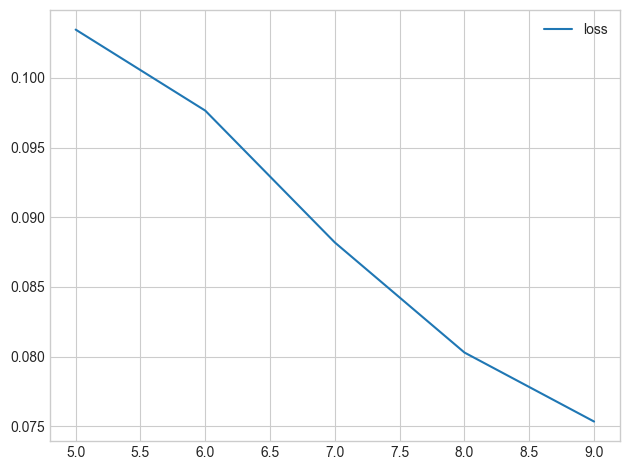

In [13]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot()